In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_rows", None)

In [2]:
final = pd.read_csv("merged.csv")
final.columns = final.columns.str.replace('_', ' ')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38862 entries, 0 to 38861
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person Description             38862 non-null  object 
 1   Place Code                     38862 non-null  object 
 2   Customer Order                 38860 non-null  object 
 3   Additional Features in market  34562 non-null  object 
 4   Promotion Name                 33034 non-null  object 
 5   Store Kind                     33053 non-null  object 
 6   Store Sales                    38847 non-null  object 
 7   Store Cost                     38855 non-null  object 
 8   Is Recyclable?                 38860 non-null  object 
 9   Yearly Income                  38854 non-null  object 
 10  Store Area                     35296 non-null  float64
 11  Grocery Area                   35255 non-null  float64
 12  Frozen Area                    35309 non-null 

In [3]:
final.duplicated().sum()

8

In [4]:
final.drop_duplicates(inplace = True)

In [5]:
final.shape

(38854, 18)

In [6]:
final.dropna(subset = ["Cost"], inplace = True)
final.shape

(38823, 18)

In [7]:
final.isna().sum()

Person Description                  0
Place Code                          0
Customer Order                      2
Additional Features in market    4292
Promotion Name                   5824
Store Kind                       5807
Store Sales                        15
Store Cost                          7
Is Recyclable?                      2
Yearly Income                       7
Store Area                       3564
Grocery Area                     3603
Frozen Area                      3547
Meat Area                        3545
Cost                                0
Gross Weight                     2917
Net Weight                       2891
Package Weight                   3577
dtype: int64

### Choosing the features that might have the greatest effect on the model

# **Yearly Income**

In [8]:
final["Yearly Income"].unique()

array(['10K+', '50K+', '30K+', '130K+', '70K+', '110K+', '90K+', '150K+',
       nan], dtype=object)

In [9]:
final["Yearly Income"].value_counts()

30K+     12460
10K+      8363
50K+      6745
70K+      4818
130K+     2167
90K+      1782
110K+     1684
150K+      797
Name: Yearly Income, dtype: int64

In [10]:
final["Yearly Income"].isna().sum()

7

<Axes: xlabel='Yearly Income', ylabel='Cost'>

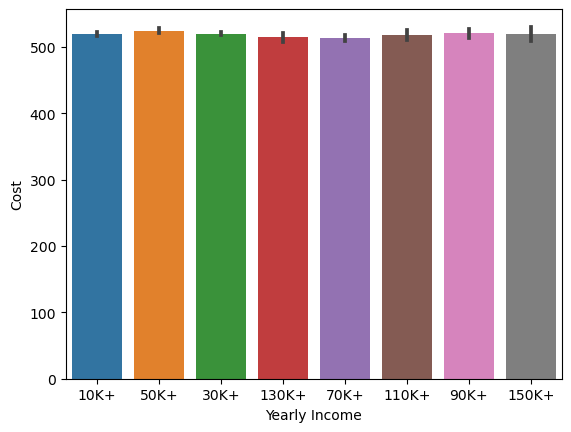

In [11]:
sns.barplot(data = final, x = "Yearly Income", y = "Cost")

In [12]:
income_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("end", OrdinalEncoder()),
])

# **Promotion Name**

In [13]:
final["Promotion Name"].isna().sum()

5824

In [14]:
final["Promotion Name"].nunique()

49

In [15]:
final["Promotion Name"].unique()

array(['Dimes Off', 'Budget Bargains', 'Shelf Emptiers', 'Savings Galore',
       'Sale Winners', 'Weekend Discount', 'Price Winners',
       'Shelf Clearing Days', 'Big Time Discounts',
       'Lottery Cash Registerion', 'Pick Your Savings', nan,
       'Super Savers', 'Two Day Sale', 'Sale Sale Sale', 'Wallet Savers',
       'Money Savers', 'Save Price', 'Best Savings', 'Big Time Saving',
       'Bag Stuffer', 'Save It (Sale)', 'Dollar Days', 'Discount Frenzy',
       'Sales Days', 'Sale : Double Down', 'Coupon Spectacular',
       'Three for One', 'Super Duper Savers', 'GLD', 'Go For It',
       'Mystery Sale', 'One Day Sale', 'I Cant Believe It Sale',
       'You Save Days', 'Double Your Savings', 'Full Free', 'Saving Days',
       'Roller Savings (High) ', 'Green Light Special', 'Price Slashers',
       'Price Cutters', 'Two for One', 'Promo Big', 'Price Destroyers',
       'Tip Top Savings', 'Best Price Savers', 'Super Wallet Savers',
       'Price Smashers', 'Fantastic Discounts

In [16]:
promotion_pipeline = Pipeline([
    ("imp", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OrdinalEncoder()),
])

# **Place Code**

In [17]:
final["Place Code"].unique()

array(['H11go_ZA', 'S04ne_WA', 'L05es_CA', 'S03le_WA', 'M10da_YU',
       'A17co_GU', 'O09ba_VE', 'S01em_OR', 'P07nd_OR', 'B06ls_CA',
       'T02ma_WA', 'V19ia_BC', 'G16ra_JA', 'B14on_WA', 'C15ho_ZA',
       'V13er_BC', 'M12ty_DF', 'B08am_WA', 'S18co_CA'], dtype=object)

In [18]:
len(final.sort_values("Cost")["Place Code"].unique())

19

In [19]:
final["Place Code"].value_counts()

T02ma_WA    3655
S01em_OR    3533
P07nd_OR    3280
S03le_WA    3241
H11go_ZA    3029
M10da_YU    2923
S04ne_WA    2876
B06ls_CA    2692
L05es_CA    2586
B14on_WA    2197
V13er_BC    2173
O09ba_VE    1660
C15ho_ZA    1495
A17co_GU     999
M12ty_DF     879
S18co_CA     496
B08am_WA     472
V19ia_BC     355
G16ra_JA     282
Name: Place Code, dtype: int64

<Axes: xlabel='Place Code', ylabel='Cost'>

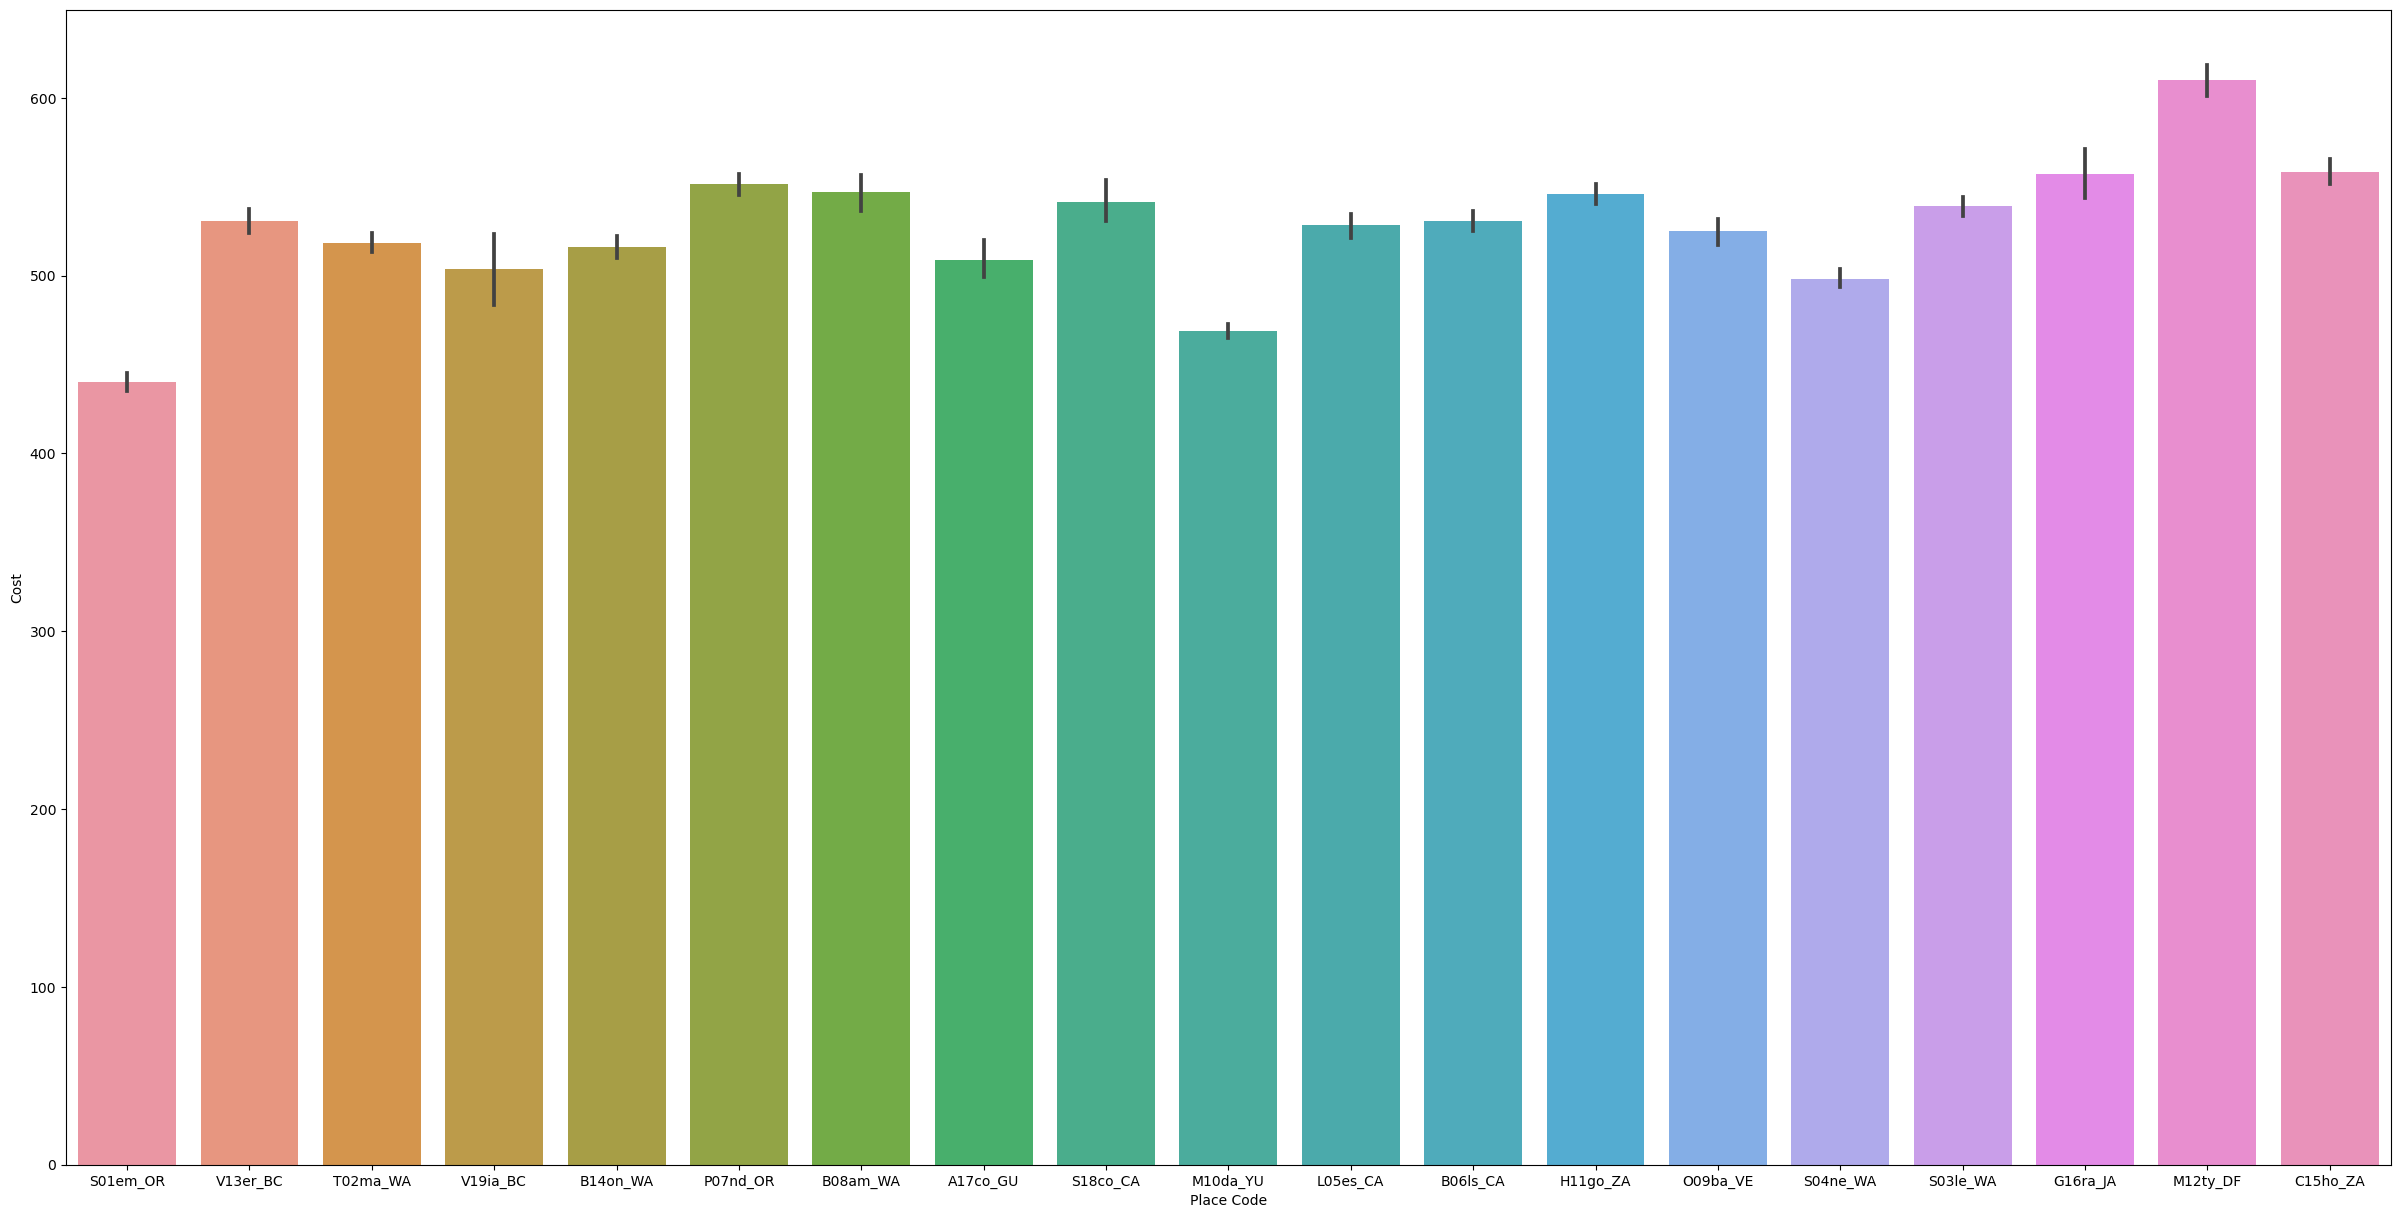

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (30, 15))
sns.barplot(data = final, x = "Place Code", y = "Cost", ax = ax, order = final.sort_values("Cost")["Place Code"].unique())

In [21]:
final["Place Code"].nunique()

19

In [22]:
final.groupby("Place Code")["Cost"].mean().sort_values()

Place Code
S01em_OR    440.139243
M10da_YU    468.812494
S04ne_WA    498.264919
V19ia_BC    503.815623
A17co_GU    508.779688
B14on_WA    516.257966
T02ma_WA    518.518126
O09ba_VE    524.872718
L05es_CA    528.229818
B06ls_CA    530.696027
V13er_BC    530.744732
S03le_WA    538.980982
S18co_CA    541.586323
H11go_ZA    546.042164
B08am_WA    547.052017
P07nd_OR    551.384773
G16ra_JA    557.196967
C15ho_ZA    558.266257
M12ty_DF    610.195167
Name: Cost, dtype: float64

In [23]:
final["Place Code"].isna().sum()

0

In [24]:
place_code_pipeline = Pipeline([
    ("end", OneHotEncoder())
])

# **Person Description**

In [25]:
final["Person Description"].nunique()

395

In [26]:
final["Person Description"].isna().sum()

0

In [27]:
final["Person Description"].unique()[:10]

array(['Single Female with four children, education: bachelors degree working as professional',
       'Single Female with three children, education: bachelors degree working as management',
       'Married Male with two children, education: high school degree working as skilled manual',
       'Single Female with three children, education: partial college working as professional',
       'Married Female with five children, education: bachelors degree working as professional',
       'Single Male with four children, education: high school degree working as manual',
       'Married Female with five children, education: high school degree working as professional',
       'Married Male with four children, education: partial high school working as skilled manual',
       'Married Male with five children, education: high school degree working as skilled manual',
       'Single Male with one child, education: high school degree working as manual'],
      dtype=object)

In [28]:
class InfoExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.children = {
            "no": 0,"one": 1,
            "two": 2,"three": 3,
            "four": 4,"five": 5,
        }
        self.pro = {
            "clerical": 5,
            "management": 4,
            "skilled manual": 3,
            "professional": 2,
            "manual": 1
        }
        self.martial_status = {
            "Married": 1, "Single":0
        }
        self.gender = {
            "Female":0, "Male":1
        }
    def fit(self, X):
        return self
    def transform(self, X):
        X["martial_status"] = X["Person Description"].str.extract('(.*?) ["Male", "Female"]')
        X["gender"] = X["Person Description"].str.extract('["Single", "Married"] (.*?) with')
        X["no_children"] = X["Person Description"].str.extract('with (.*?) ["children,", "child,"]')
        X["education"] = X["Person Description"].str.extract('education: (.*?) working')
        X["proficiency"] = X["Person Description"].str.extract('as (.*?)$')
        
        X["martial_status"] = X["martial_status"].apply(lambda x : self.martial_status.get(x, 0))
        X["gender"] = X["gender"].apply(lambda x : self.gender.get(x, 0))
        X["no_children"] = X["no_children"].apply(lambda x : self.children.get(x, 0))
        X["proficiency"] = X["proficiency"].apply(lambda x : self.pro.get(x, 0))
        
        X.drop("Person Description", axis = 1, inplace = True)
        return X

In [29]:
person_desc_pipeline = Pipeline([
    ("extractor", InfoExtractor()),
    ("enc", OrdinalEncoder())
])


##### **Customer Order (Despite it might seem promising but really has a negative effect on the model so we only deleted nan values)**

In [30]:
final["Customer Order"].nunique()

271

In [31]:
final["Customer Order"].isna().sum()

2

In [32]:
cost_has_value = final['Cost'].notna()  
order_has_value = final['Customer Order'].notna()  

num_missing_order = cost_has_value & ~order_has_value 
count = num_missing_order.sum()

print(f"Number of values with Cost but no Order: {count}")

Number of values with Cost but no Order: 2


In [33]:
final.dropna(subset = ["Customer Order"], inplace = True)

# **Final pipeline**

In [34]:
final.head(2)

,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Gross Weight,Net Weight,Package Weight
0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,recyclable,10K+,2842.23,2037.64,481.98,323.0,602.7575,28.1997,26.6008,1.599
1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650,16.5710,14.9720,1.599


In [35]:
train, test = train_test_split(final, test_size = 0.2, random_state = 42)

In [36]:
train.shape, test.shape

((31056, 18), (7765, 18))

In [37]:
train.dropna(subset = ["Promotion Name"], inplace = True)
test.dropna(subset = ["Promotion Name"], inplace = True)

In [38]:
clean = ColumnTransformer([
    ("income", income_pipeline, ["Yearly Income"]),
    ("promotion", promotion_pipeline, ["Promotion Name"]),
    ("place", place_code_pipeline, ["Place Code"]),
    ("info", person_desc_pipeline, ["Person Description"]),
])

train_x = train.drop("Cost", axis = 1)
train_y = train["Cost"]
test_x = test.drop("Cost", axis = 1)
test_y = test["Cost"]

train_prepared = clean.fit_transform(train_x)
test_prepared = clean.transform(test_x)

In [39]:
train_prepared.shape

(26431, 26)

In [40]:
train_prepared[0]

array([ 5., 37.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  1.])

In [41]:
# best 2 models so far
reg = VotingRegressor([
    ("forest", RandomForestRegressor(random_state = 42, n_estimators = 145)),
    ("extra", ExtraTreesRegressor(random_state = 42, n_estimators = 140)),
])
res = cross_val_score(reg, train_prepared, train_y, scoring = "neg_root_mean_squared_error", n_jobs = -1, verbose = True, cv = 5)
res

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.2s remaining:   40.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.4s finished


array([-39.29964585, -37.3699518 , -41.84442128, -38.20823312,
       -36.01788021])

In [42]:
np.mean(res), np.std(res)

(-38.548026452697144, 1.9665253610084377)

In [43]:
reg.fit(train_prepared, train_y)

VotingRegressor(estimators=[('forest',
                             RandomForestRegressor(n_estimators=145,
                                                   random_state=42)),
                            ('extra',
                             ExtraTreesRegressor(n_estimators=140,
                                                 random_state=42))])

In [44]:
reg.estimators_[0].feature_importances_

array([0.01673364, 0.45244274, 0.01641024, 0.02472771, 0.01045886,
       0.0556211 , 0.02597346, 0.00850118, 0.02820336, 0.03137033,
       0.02176449, 0.0229821 , 0.02339456, 0.04714907, 0.0289355 ,
       0.02276268, 0.01409487, 0.01171336, 0.03211594, 0.03199316,
       0.0053857 , 0.00848273, 0.00941175, 0.02417009, 0.01238066,
       0.01282072])

In [45]:
train_pred = reg.predict(train_prepared)
print(mse(train_y, train_pred))
print(mae(train_y, train_pred))
print(np.sqrt(mse(train_y, train_pred)))

634.1813056780242
5.398226094128699
25.18295665083876


In [46]:
test_prepared.shape

(6566, 26)

In [47]:
reg.score(train_prepared, train_y)

0.9742521263318109

In [48]:
reg.score(test_prepared, test_y)

0.9460427418582421

In [49]:
preds = reg.predict(test_prepared)
mse_ = mse(test_y, preds)
mae_ = mae(test_y, preds)
rmse = np.sqrt(mse_)
print(mse_, mae_, rmse, sep = "\n")

1343.548334973451
9.164920084471214
36.654444955195416


# **Test**

In [50]:
final_test = pd.read_csv("test.csv")
final_test.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area
0,0,"Single Male with four children, education: par...",B06ls_CA,"Candy from Snacks department, Ordered Brand : ...","['Florist', 'Ready Food', 'Video Store', 'Bar ...",Fantastic Discounts,Gourmet,11.76 Millions,4.704 Millions,31.8337,28.7811,3.0525,yes,50K+,2201.06,1424.85,465.54,308.73
1,1,"Married Female with three children, education:...",S01em_OR,"Vegetables from Frozen Foods department, Order...","['Florist', 'Coffee Bar', 'Ready Food', 'Bar F...",Bag Stuffer,Deluxe,2.16 Millions,0.6696 Millions,29.9440,27.0368,2.9072,no,70K+,2577.16,1735.17,505.07,336.59
2,2,"Single Female with three children, education: ...",H11go_ZA,"Dairy from Dairy department, Ordered Brand : Club","['Bar For Salad', 'Video Store', 'Ready Food',...",Pick Your Savings,Deluxe,1.83 Millions,0.8235 Millions,29.2172,26.3100,2.9072,no,130K+,2837.58,2038.11,481.98,321.26
3,3,"Single Male with three children, education: pa...",M10da_YU,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Video Store', 'Bar For Salad',...",Price Winners,Deluxe,8.82 Millions,4.41 Millions,28.0543,25.0018,3.0525,no,10K+,2859.04,1871.16,593.93,394.58
4,4,"Single Male with two children, education: high...",L05es_CA,"Hot Beverages from Beverages department, Order...",['Florist'],Dollar Days,Supermarket,4.32 Millions,1.9872 Millions,23.5482,20.6410,2.9072,no,30K+,2193.97,1320.15,523.32,348.85


In [51]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19942 non-null  int64  
 1   Person Description             19942 non-null  object 
 2   Place Code                     19942 non-null  object 
 3   Customer Order                 19942 non-null  object 
 4   Additional Features in market  19942 non-null  object 
 5   Promotion Name                 19916 non-null  object 
 6   Store Kind                     19914 non-null  object 
 7   Store Sales                    19942 non-null  object 
 8   Store Cost                     19942 non-null  object 
 9   Gross Weight                   18959 non-null  float64
 10  Net Weight                     18924 non-null  float64
 11  Package Weight                 19942 non-null  float64
 12  Is Recyclable?                 19942 non-null 

In [52]:
final_test.isna().sum()

Unnamed: 0                          0
Person Description                  0
Place Code                          0
Customer Order                      0
Additional Features in market       0
Promotion Name                     26
Store Kind                         28
Store Sales                         0
Store Cost                          0
Gross Weight                      983
Net Weight                       1018
Package Weight                      0
Is Recyclable?                      0
Yearly Income                       0
Store Area                        996
Grocery Area                     1042
Frozen Area                       961
Meat Area                         975
dtype: int64

In [53]:
final_test_pre = clean.transform(final_test)

In [54]:
final_test_pre

array([[ 5., 11.,  0., ...,  4.,  4.,  2.],
       [ 6.,  0.,  0., ...,  3.,  1.,  1.],
       [ 2., 21.,  0., ...,  3.,  4.,  3.],
       ...,
       [ 5.,  2.,  0., ...,  5.,  0.,  3.],
       [ 6.,  0.,  0., ...,  1.,  1.,  1.],
       [ 4., 39.,  0., ...,  2.,  2.,  0.]])

In [55]:
final_test_pre.shape

(19942, 26)

In [56]:
final_pred = reg.predict(final_test_pre)

In [57]:
id = final_test.loc[:, "Unnamed: 0"]

In [58]:
final_pred.shape

(19942,)

In [59]:
sub = pd.DataFrame(columns = ["ID", "Cost"])
sub["ID"] = id
sub["Cost"] = final_pred
sub.head()

,ID,Cost
0,0,718.915800
1,1,654.886327
2,2,739.417400
3,3,436.966500
4,4,748.099200


In [60]:
sub.to_csv("final.csv", index = False)